In [1]:
OUTDATED_IGNORE=1

import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
import os, pickle
import pingouin as pg

/volatile/miniconda3/envs/ohbm/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/volatile/miniconda3/envs/ohbm/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


## L1

In [2]:
df = pd.read_csv('../DerivedData/cohortA_subjects_clinical.csv', index_col=0)

with open('../DerivedData/cohorts_subjects_list.pickle', 'rb') as handle:
    cohorts = pickle.load(handle)
    
df = df[df.subject_id.isin(cohorts['A'])]

In [11]:
diff = pd.read_csv('../DerivedData/extracted_metrics/neonat_segmentation_diffusion_metric_median.csv', index_col=0)

FA_cols = [col for col in diff.columns if 'L1' in col]
FA_cols.extend(['subject_id'])

new_df = df[df.subject_id.isin(cohorts['A'])].copy()
new_df = pd.merge(new_df, diff[FA_cols], on=['subject_id'])

FA_cols.extend(['PMA_scan'])
inX = new_df[FA_cols].values

In [12]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='darkgray')
    plt.setp(bp['caps'], color='darkgray')
    plt.setp(bp['medians'], color=color)
    plt.setp(bp['fliers'], color='darkgray', alpha=0.5)
    
scheme = pd.read_csv('../SourceData/atlas_labelling_scheme.csv')
lbs = [name.split('_')[1] for name in FA_cols[:-2]]
names = [scheme[scheme.Label == int(l)]['Abbreviation'].values[0] + ' ' +  scheme[scheme.Label == int(l)]['Hemisphere'].values[0]for l in lbs]    

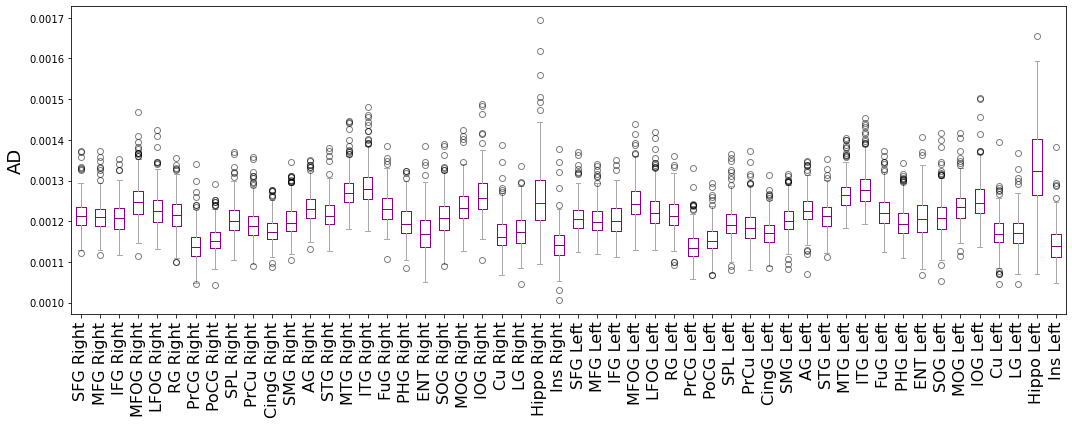

In [15]:
fig, axs = plt.subplots(1,1,figsize=(15,6))

for idx in FA_cols[:-2]:
    new_df[idx].fillna(new_df[idx].median(), inplace=True)

bpl = axs.boxplot([ new_df[idx].values for idx in FA_cols[:-2]], positions= range(len(FA_cols[:-2])), 
            labels=names, )
set_box_color(bpl, 'darkmagenta')

#bpl = axs[1].boxplot([ outX_res[:, idx] for idx in range(len(FA_cols[:-2]))], positions= range(len(FA_cols[:-2])), 
#            labels=names, )
#set_box_color(bpl, 'darkmagenta')

#bpl = axs[2].boxplot([ outX_res_40[:, idx] for idx in range(len(FA_cols[:-2]))], positions= range(len(FA_cols[:-2])), 
#            labels=names, )
#set_box_color(bpl, 'darkmagenta')


#for ax, label in zip(axs, ['FA', 'residual FA', 'FA (TEA)']):
for ax, label in zip([axs], ['AD']):
    #axs[0].set_xticks( fontsize=14)
    ax.xaxis.set_tick_params(labelrotation=90, labelsize=16)
    ax.set_ylabel(label, fontsize=18 )

#plt.hlines(0.1,0,len(names)+1, linestyles='--', color='red')

plt.tight_layout()
plt.savefig('../Results/figures/reviewers_replies_AD_distribution_cohortA.png', dpi=500, facecolor='white', transparent=False)
plt.show()

## ROUND 2

In [2]:
df = pd.read_csv('../DerivedData/cohortA_subjects_clinical.csv', index_col=0)

with open('../DerivedData/cohorts_subjects_list.pickle', 'rb') as handle:
    cohorts = pickle.load(handle)

In [5]:
df = df[df.subject_id.isin(cohorts['D'])]

In [12]:
len(df[df.PMA_scan >= 37])

111

In [9]:
df

,subject_id,session_id,template,PMA_scan,GA_birth,Sex,Weight_birth,Radiology_score,ethnicity_mother,ethnicity_father,...,Current_smore,Current_alcohol,Current_smoke_alcohol,HIE,oxygen_days,lung_disease,Necrotising_enterocolitis,Cognitive Score,Language Score,Motor Score
1,CC00063BN06,15104,36.0,35.71,35.142857,female,2.100,1.0,White,White,...,No,No,No,No,0.0,No,No,105.0,109.0,100.0
2,CC00065XX08,18600,39.0,40.71,40.428571,male,3.400,2.0,White,White,...,No,No,No,No,0.0,No,No,110.0,97.0,100.0
3,CC00067XX10,20200,39.0,40.14,40.000000,male,3.125,1.0,Asian/Asian British,Asian/Asian British,...,No,No,No,No,0.0,No,No,90.0,79.0,97.0
5,CC00071XX06,27000,39.0,40.43,39.857143,female,3.320,1.0,White,White,...,No,No,No,No,0.0,No,No,100.0,109.0,94.0
6,CC00072XX07,27600,39.0,40.00,39.571429,female,2.155,2.0,Asian/Asian British,Asian/Asian British,...,No,No,No,No,0.0,No,No,95.0,91.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,CC00915XX16,18530,39.0,40.14,38.428571,female,2.900,2.0,White,White,...,No,No,No,No,0.0,No,No,100.0,100.0,97.0
345,CC00928XX21,37430,39.0,39.71,39.571429,female,3.100,2.0,White,Other,...,No,No,No,No,0.0,No,No,100.0,103.0,107.0
356,CC01086XX15,100430,39.0,41.29,38.714286,male,2.810,1.0,White,White,...,No,No,No,No,0.0,No,No,100.0,68.0,91.0
360,CC01111XX06,100031,39.0,40.71,35.714286,male,2.145,1.0,Chinese,White,...,No,No,No,No,0.0,No,No,110.0,106.0,107.0


In [4]:
ages = []
for i in range(100):
    
    a= df.sample(n=46).copy()
    ages.append(len(a[a.PMA_scan > 39])/len(a))
    #print(len(a[a.PMA_scan > 39]))

In [5]:
np.mean(ages)

0.6991304347826086

In [6]:
np.std(ages)

0.053578908470518966

In [7]:
## median FA regions 
diff = pd.read_csv('../DerivedData/extracted_metrics/neonat_segmentation_diffusion_metric_median.csv', index_col=0)

FA_cols = [col for col in diff.columns if 'FA' in col]
FA_cols.extend(['subject_id'])

new_df = df[df.subject_id.isin(cohorts['D'])].copy()
new_df = pd.merge(new_df, diff[FA_cols], on=['subject_id'])

FA_cols.extend(['PMA_scan'])
inX = new_df[FA_cols].values

In [8]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='darkgray')
    plt.setp(bp['caps'], color='darkgray')
    plt.setp(bp['medians'], color=color)
    plt.setp(bp['fliers'], color='darkgray', alpha=0.5)

In [9]:
scheme = pd.read_csv('../SourceData/atlas_labelling_scheme.csv')
lbs = [name.split('_')[1] for name in FA_cols[:-2]]
names = [scheme[scheme.Label == int(l)]['Abbreviation'].values[0] + ' ' +  scheme[scheme.Label == int(l)]['Hemisphere'].values[0]for l in lbs]

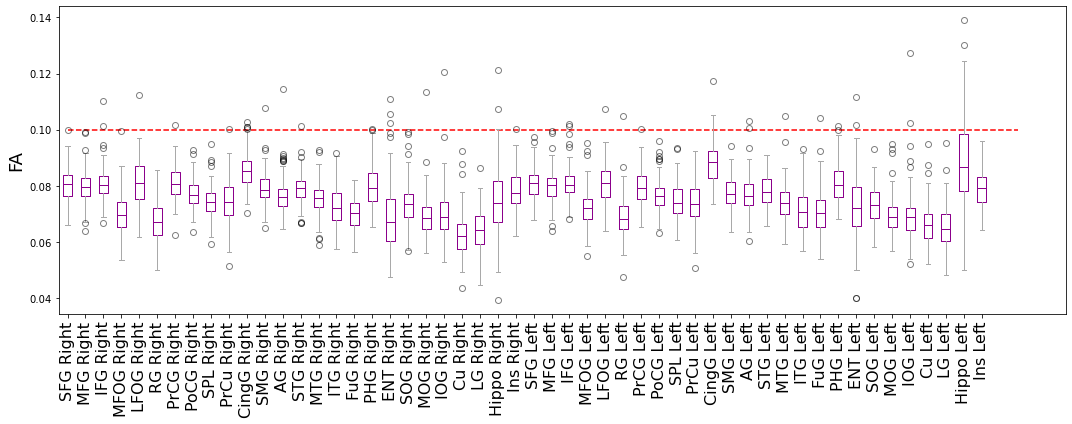

In [10]:
fig, axs = plt.subplots(1,1,figsize=(15,6))

for idx in FA_cols[:-2]:
    new_df[idx].fillna(new_df[idx].median(), inplace=True)

bpl = axs.boxplot([ new_df[idx].values for idx in FA_cols[:-2]], positions= range(len(FA_cols[:-2])), 
            labels=names, )
set_box_color(bpl, 'darkmagenta')

#bpl = axs[1].boxplot([ outX_res[:, idx] for idx in range(len(FA_cols[:-2]))], positions= range(len(FA_cols[:-2])), 
#            labels=names, )
#set_box_color(bpl, 'darkmagenta')

#bpl = axs[2].boxplot([ outX_res_40[:, idx] for idx in range(len(FA_cols[:-2]))], positions= range(len(FA_cols[:-2])), 
#            labels=names, )
#set_box_color(bpl, 'darkmagenta')


#for ax, label in zip(axs, ['FA', 'residual FA', 'FA (TEA)']):
for ax, label in zip([axs], ['FA']):
    #axs[0].set_xticks( fontsize=14)
    ax.xaxis.set_tick_params(labelrotation=90, labelsize=16)
    ax.set_ylabel(label, fontsize=18 )

plt.hlines(0.1,0,len(names)+1, linestyles='--', color='red')

plt.tight_layout()
plt.savefig('../Results/figures/reviewers_replies_FA_distribution_cohortD.png', dpi=500, facecolor='white', transparent=False)
plt.show()

### Preparation for risk factors 

In [7]:
df = pd.read_csv('../DerivedData/cohortA_subjects_clinical.csv', index_col=0)

with open('../DerivedData/cohorts_subjects_list.pickle', 'rb') as handle:
    cohorts = pickle.load(handle)
    
df = df[df.subject_id.isin(cohorts['A'])]

In [8]:
diff = pd.read_csv('../DerivedData/extracted_metrics/global_cortical_FA_metrics_median_minAD.csv', index_col=0)
metrics = ['FA', 'L1', 'RD', 'MD']
metrics = ['FA']
hemispheres = ['left', 'right']
for metric in metrics:
    for i, row in diff.iterrows():
        diff.loc[i,metric] = np.mean([row['left_{}'.format(metric)], 
                                   row['right_{}'.format(metric)]])

In [9]:
new_df = pd.merge(df, diff[['subject_id', 'FA']], on=['subject_id'])

In [10]:
## correction 
import pwlf
inX= new_df.FA.values

inflection = 36

outX_res = np.zeros_like(new_df['FA'].values)
outX_res_40 = np.zeros_like(new_df['FA'].values)

x0 = np.array([min(new_df.PMA_scan.values), inflection, max(new_df.PMA_scan.values)])  
median = np.nanmedian(new_df.FA.values.astype(np.float32))
indices = np.where(pd.isna(inX))
for n in indices:
    inX[n]=median
    
### fit the corrector
myPWLF = pwlf.PiecewiseLinFit(new_df.PMA_scan.values.astype(np.float32), inX.astype(np.float32))
myPWLF.fit_with_breaks(x0)
yHat = myPWLF.predict(new_df.PMA_scan.values)
outX_res = inX - yHat

In [11]:
new_df['corr_FA'] = outX_res

In [12]:
new_df[['subject_id', 'corr_FA', 'Sex', 'GA_birth']].to_csv('for_risk_factors_ANOVA_new_minAD.csv')

#### adding the IMD scores as environment

In [13]:
info = pd.read_csv('../SourceData/descriptive_data_labels.csv', low_memory=False)
info = info.dropna(axis=1, how='all')
info = info[info['Participant ID'].isin(df.subject_id.values)]

In [14]:
info = info[['Participant ID', 'IMD Score']].dropna()

In [15]:
info.rename(columns={'Participant ID': 'subject_id', 
                    'IMD Score': 'IMD'}, inplace=True)

In [16]:
new_df = pd.merge(new_df, info, on=['subject_id'])

In [17]:
new_df.rename(columns={
    'Cognitive Score': 'Cognitive',
    'Language Score': 'Language', 
    'Motor Score': 'Motor'
    
}, inplace=True)

In [18]:
new_df['sex'] = 1
new_df.loc[new_df.Sex == 'female ', 'sex'] = 0


In [19]:
new_df[['subject_id', 'corr_FA', 'sex', 'GA_birth', 'IMD', 'PMA_scan',
       'Cognitive', 'Language', 'Motor']].to_csv('for_risk_and_env_factors_new_minAD.csv')

In [71]:
new_df

,subject_id,session_id,template,PMA_scan,GA_birth,Sex,Weight_birth,Radiology_score,ethnicity_mother,ethnicity_father,...,oxygen_days,lung_disease,Necrotising_enterocolitis,Cognitive,Language,Motor,FA,corr_FA,IMD,sex
0,CC00063AN06,15102,36.0,35.71,35.142857,female,1.950,1.0,White,White,...,0.0,No,No,105.0,106.0,115.0,0.081224,0.004171,13.19,0
1,CC00063BN06,15104,36.0,35.71,35.142857,female,2.100,1.0,White,White,...,0.0,No,No,105.0,109.0,100.0,0.071140,-0.005913,13.19,0
2,CC00065XX08,18600,39.0,40.71,40.428571,male,3.400,2.0,White,White,...,0.0,No,No,110.0,97.0,100.0,0.076841,0.000564,5.20,1
3,CC00067XX10,20200,39.0,40.14,40.000000,male,3.125,1.0,Asian/Asian British,Asian/Asian British,...,0.0,No,No,90.0,79.0,97.0,0.064858,-0.011388,39.94,1
4,CC00068XX11,20701,39.0,40.71,40.428571,female,3.580,1.0,White,White,...,0.0,No,No,115.0,112.0,127.0,0.079762,0.003485,44.17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,CC01190XX12,143030,39.0,42.14,40.142857,female,3.760,1.0,White,White,...,0.0,No,No,75.0,74.0,82.0,0.075683,-0.000672,25.80,0
291,CC01192XX14,147330,39.0,43.57,40.285714,male,3.940,1.0,White,White,...,0.0,No,No,85.0,91.0,110.0,0.072460,-0.003974,22.80,1
292,CC01198XX20,140930,39.0,42.00,41.571429,female,3.400,1.0,White,White,...,0.0,No,No,115.0,115.0,115.0,0.075381,-0.000967,11.95,0
293,CC01199XX21,141130,39.0,40.14,39.857143,male,3.135,1.0,Asian/Asian British,Asian/Asian British,...,0.0,No,No,80.0,50.0,100.0,0.079567,0.003321,37.74,1


In [87]:
### for plotting
a = new_df.sort_values(by=['PMA_scan'])
for age in [32,34,36,38,40,42]:
    print(age, ':', a[a.PMA_scan > age]['subject_id'].values[0])

32 : CC00802XX10
34 : CC00788XX22
36 : CC00648XX22
38 : CC00350XX04
40 : CC00915XX16
42 : CC01190XX12


In [78]:
subj = pd.read_csv('for_risk_and_env_factors.csv')
subj['group_cat'] = 0
subj.loc[subj['GA_birth'] < 37, 'group_cat'] = 1
subj.loc[subj['GA_birth'] < 32, 'group_cat'] = 2

In [83]:
len(subj[subj['group_cat'] == 2])

8

In [95]:
df = pd.read_csv('../Results/predictions/AUC_categorical.csv')
#results = results[results.Task == 'prematurity']
segms = ['Segmentation 52', 'Random 128', 'Random 256', 'Random 512', 'Random 1024']
auc = np.array([0.594, 0.464, 0.497, 0.480, 0.487])
std = np.array([0.014,0.020,0.019,0.012,0.021])

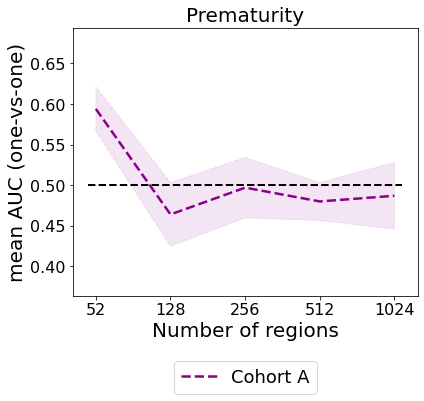

In [110]:
df = pd.read_csv('../Results/predictions/AUC_categorical.csv')
#results = results[results.Task == 'prematurity']
segms = ['Segmentation 52', 'Random 128', 'Random 256', 'Random 512', 'Random 1024']

fix, axs = plt.subplots(1,1, figsize=(6,6), sharey=False)
colors = ['darkmagenta', 'chocolate', 'steelblue', 'chartreuse', 'lightcoral']

x =range(len(segms))
y1= auc+ (1.96*std)
y2= auc- (1.96*std)


axs.plot(x,auc, color='darkmagenta', linestyle='--', linewidth=2.5, label='Cohort A')
axs.fill_between(x, y1, y2, color='darkmagenta',  linestyle='--', alpha=0.1)
        
axs.set_ylim(np.min(auc)-0.1, np.max(auc)+0.1)
plt.title('Prematurity', fontsize =20)
plt.hlines(0.5,-.1,4.1, linestyles='dashed', colors='black', linewidth=2)
plt.ylabel('mean AUC (one-vs-one)', fontsize=20)
plt.xlabel('Number of regions', fontsize=20)
axs.set_xticks(ticks=x)
axs.set_xticklabels([segm.split(' ')[1] for segm in segms], size=16)
axs.tick_params(axis='both', which='major', labelsize=16)
    
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4), fontsize=18)
plt.tight_layout()
plt.show()
    